<h1>BASICS</h1>

<h2> Theorie </h2>

<h4> TIF: Tagged Image File </h4>

- kann mehrere Bilder mit unterschiedlichen Eigenschaften enthalten
- es ist möglich mehrere Varianten eines Bildes in einer TIF-Datei abzulegen
- meist unkomprimierte Bilder
- gepackte Anordnung

![](img/gepackteAnordnung.png)

<h4> Module </h4>

In [2]:
import os
import cv2;             print("cv2 ", cv2.__version__)
import numpy as np;     print("np ", np.__version__)
import skimage;         print("skimage ", skimage.__version__)
from skimage import io
import imageio;         print("imageio ", imageio.__version__)
from libtiff import TIFF
import matplotlib.pyplot as plt; print("matplotlib: 3.2.2")
%matplotlib inline

cv2  3.4.2
np  1.18.5
skimage  0.17.2
imageio  2.8.0
matplotlib: 3.2.2


<h4>Constants</h4>

In [3]:
DIR_IMG = os.path.join(os.getcwd(), "img")

In [4]:
DIR_NOSHOCK =   os.path.join(DIR_IMG, "0-no-shock")
DIR_300 =       os.path.join(DIR_IMG, "1-300")
DIR_600 =       os.path.join(DIR_IMG, "2-600")
DIR_900 =       os.path.join(DIR_IMG, "3-900")
DIR_ANNOTATED = os.path.join(DIR_IMG, "4-annotated")

In [5]:
IMG_NAME_ANNOTATED = 'img632-300-annotiert.tif'
FILE_IMG_ANNOTATED = os.path.join(DIR_ANNOTATED, IMG_NAME_ANNOTATED)
FILE_IMG_ANNOTATED

'C:\\Users\\cweng\\PycharmProjects\\crackdetection\\img\\4-annotated\\img632-300-annotiert.tif'

In [6]:
IMG_NAME = "Image_632.tif"
FILE_IMG = os.path.join(DIR_300, IMG_NAME)
FILE_IMG

'C:\\Users\\cweng\\PycharmProjects\\crackdetection\\img\\1-300\\Image_632.tif'

<h4> Functions </h4>

In [7]:
def show_imgs(image_name_tuples, rows=1, cols=2, size=(10, 10)):
    plt.figure(1, figsize=size)
    for i, image_name in enumerate(image_name_tuples):
        img, name = image_name
        c_map = None if img.shape[-1] == 3 else plt.cm.gray
        
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap=c_map)
        #plt.xticks([]), plt.yticks([])
        plt.title(name)
    return

<h4> Instances </h4>

In [8]:
img = cv2.imread(FILE_IMG, cv2.IMREAD_UNCHANGED)
img_a = cv2.imread(FILE_IMG_ANNOTATED, cv2.IMREAD_UNCHANGED)

Konvertieren: BGRA -> RGBA

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
img_a = cv2.cvtColor(img_a, cv2.COLOR_BGRA2RGBA)

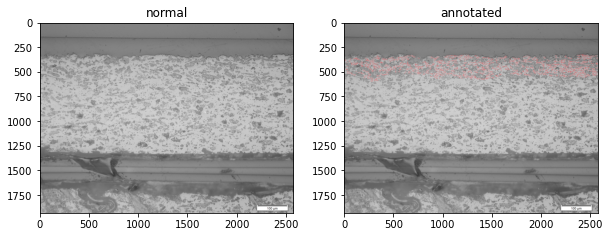

In [10]:
show_imgs(((img, "normal"), (img_a, "annotated")))

<h4> Statistics </h4>

In [11]:
print("shape: \t", img.shape)
print("channels:", len(img.shape))
print("size: \t", img.size)
print("dtype: \t", img.dtype)
print("min: \t", img.min())
print("max: \t", img.max())
print("mean: \t", img.mean())

shape: 	 (1932, 2576, 4)
channels: 3
size: 	 19907328
dtype: 	 uint8
min: 	 0
max: 	 255
mean: 	 179.0672146457827


<h4> Color Spaces </h4>
<h5> RGBA </h5>

In [12]:
img_alpha = img[:, :, 3]
print(img_alpha.shape)
img_alpha

(1932, 2576)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
img_alpha = np.where(img_alpha < 255)
img_alpha

(array([], dtype=int64), array([], dtype=int64))

- alpha channel kann gelöscht werden (alle alpha werte 255)

<h5> RGBA -> RGB </h5>

In [14]:
img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
img_a = cv2.cvtColor(img_a, cv2.COLOR_RGBA2RGB)
img.shape

(1932, 2576, 3)

In [15]:
#r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
r, g, b = cv2.split(img)
rgba_tuples = ((r, 'red'), (g, 'green'), (b, 'blue'))

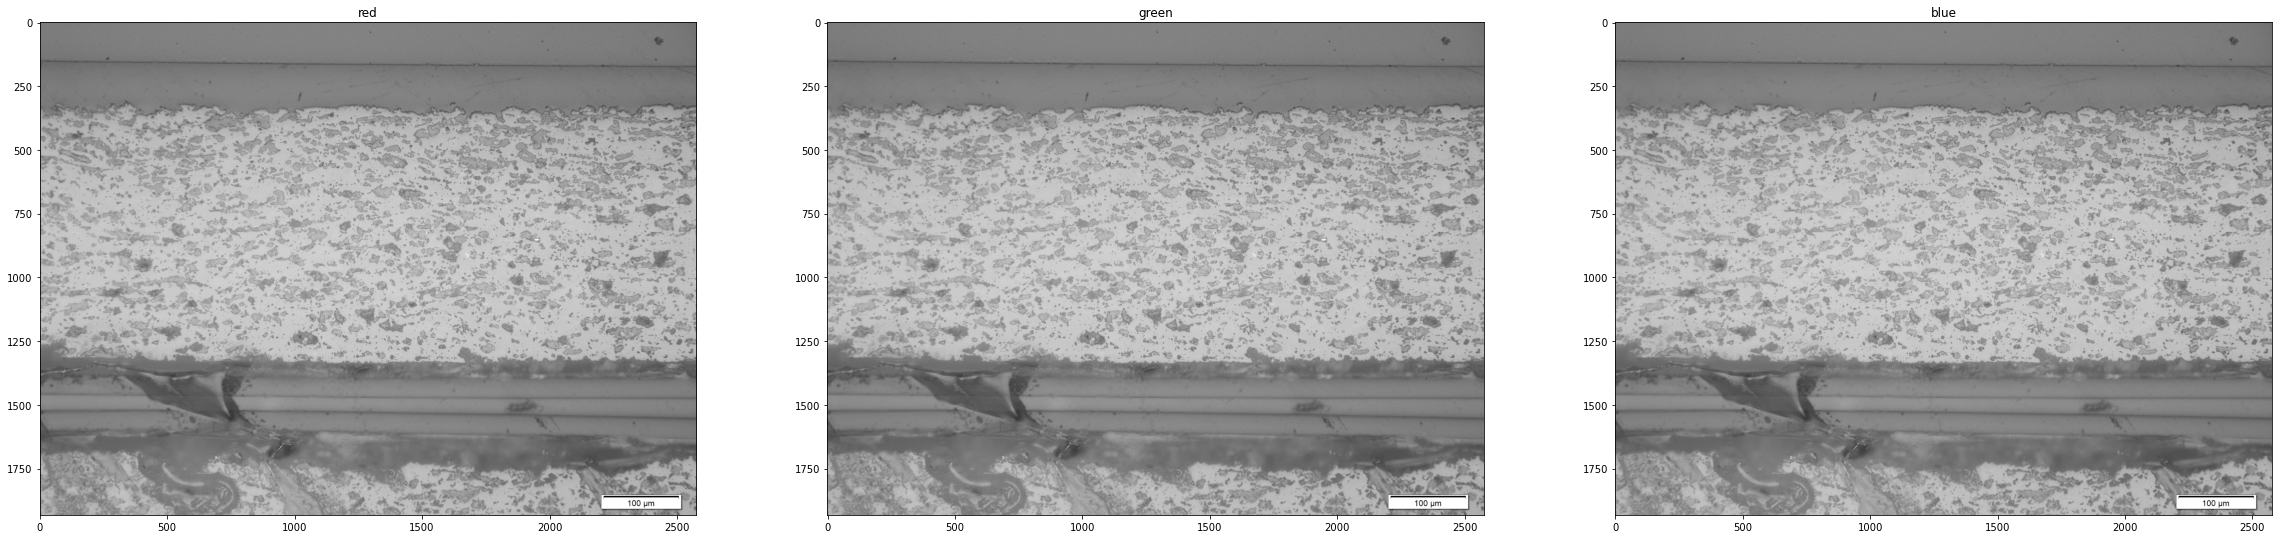

In [16]:
show_imgs(rgba_tuples, rows=1, cols=3, size=(40, 40))

<h5> RGB -> HSV </h5>

In [17]:
img_hsv = cv2.cvtColor(img_a, cv2.COLOR_RGB2HSV)
img_hsv.shape

(1932, 2576, 3)

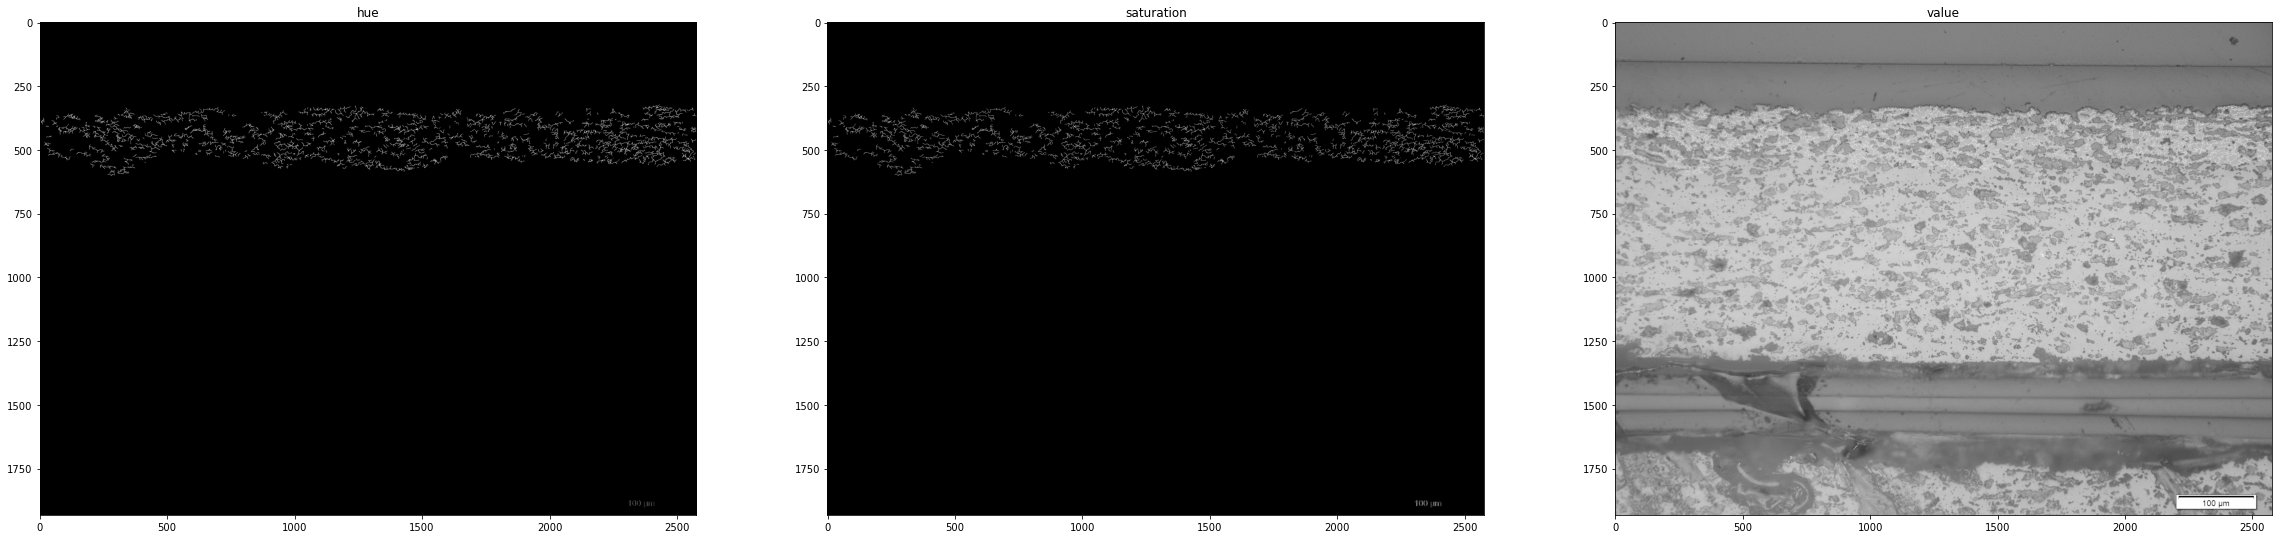

In [18]:
h, s, v = cv2.split(img_hsv)
hsv_tuples = ((h, 'hue'), (s, 'saturation'), (v, 'value'))
show_imgs(hsv_tuples, rows=1, cols=3, size=(40, 40))

In [19]:
img_hsv[325,2426]

array([179, 225, 237], dtype=uint8)

Entsprechen hue, saturation werte den Annotierungen?

<h5> RGB -> Gray </h5>

In [20]:
img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_g.shape

(1932, 2576)

<h4> Annotierungen </h4>

In [21]:
annotated_pixels_list = []
hsv_pixel_list = []

height, width, depth = img_a.shape
for x in range(height):
    for y in range(width):
        if (img_a[x,y,0] != img_a[x,y,1] != img_a[x,y,2]):
            annotated_pixels_list.append((x,y))
        if (img_hsv[x,y,1] != 0):
            hsv_pixel_list.append((x,y))
            
print("First few annotation pixel-coordinates: ", annotated_pixels_list[:5])
print("# of annotated pixel: ", len(annotated_pixels_list))
print("First few pixel-coordinates with saturation != 0", hsv_pixel_list[:5])
print("# of pixel with saturation != 0: ", len(hsv_pixel_list))

First few annotation pixel-coordinates:  [(324, 2428), (324, 2429), (325, 2426), (325, 2427), (325, 2428)]
# of annotated pixel:  34087
First few pixel-coordinates with saturation != 0 [(324, 2428), (324, 2429), (325, 2426), (325, 2427), (325, 2428)]
# of pixel with saturation != 0:  34412


(1932, 2576)


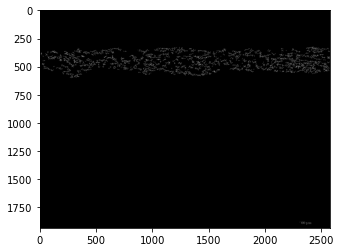

In [22]:
img_a_mask = np.zeros(img.shape)
img_a_mask = img_a_mask[:,:,0]

print(img_a_mask.shape)

for pixel in annotated_pixels_list:
    x,y = pixel
    img_a_mask[x, y] = 1
    
plt.imshow(img_a_mask, cmap='binary_r')

<h4>Histogramme</h4>

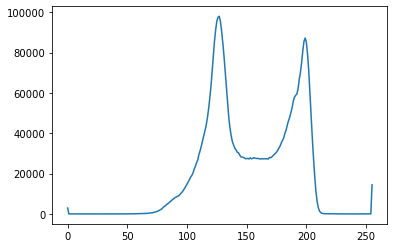

In [23]:
hist = cv2.calcHist([img_g], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)

<h4> Histogramm der Region of Interest ROI </h4>

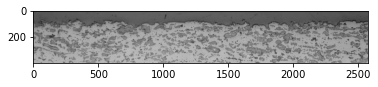

In [24]:
img_roi = img_g[250:650, :]
plt.imshow(img_roi, cmap="gray")

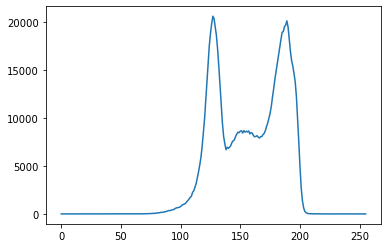

In [25]:
hist_roi = cv2.calcHist([img_roi], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_roi)

In [26]:
mean_img_roi = img_roi.mean()
mean_img_roi

158.05478940217392

- bimodales Histogramm (2 Spitzen)
- evtl. sogar 3 Spitzen --> multiple or variable thresholding??

<h4> Thresholding </h4>

Threshold value:  158.0


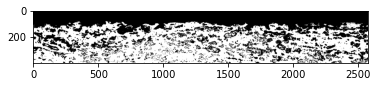

In [27]:
# cv2.THRESH_BINARY
# cv2.THRESH_OTSU
ret, img_thresh_binary = cv2.threshold(img_roi, thresh=mean_img_roi, maxval=255, type=cv2.THRESH_BINARY)
print("Threshold value: ", ret)
plt.imshow(img_thresh_binary, cmap="gray")

<h5> Otsu </h5>

Threshold value:  156.0


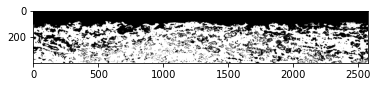

In [28]:
ret, img_thresh_otsu = cv2.threshold(img_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Threshold value: ", ret)
plt.imshow(img_thresh_otsu, cmap="gray")

<h5> Adaptive Thresholding </h5>

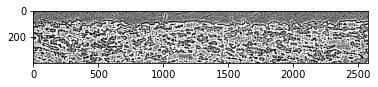

In [37]:
# cv2.ADAPTIVE_THRESH_MEAN_C
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C
img_thresh_2 = cv2.adaptiveThreshold(img_roi, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=21, C=0)
plt.imshow(img_thresh_2, cmap="gray")

<h4>Interaktiv</h4>

In [30]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [31]:
img_name_dic = {"roi":img_roi, "gray":img_g}

In [32]:
@interact(img = img_name_dic.keys(), thresh=(0, 255, 10))
def hist_and_thresh(img, thresh):
    img = img_name_dic.get(img)
    hist = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    ret, img_thresh = cv2.threshold(img, thresh=thresh, maxval=255, type=cv2.THRESH_BINARY)
    
    fig = plt.figure(figsize=(20,5))
    
    fig.add_subplot(121)
    plt.title('histogram')
    plt.axvline(x=thresh, color="r", linestyle="dashed", linewidth=2)
    #plt.yscale("log")
    plt.plot(hist)
    
    fig.add_subplot(122)
    plt.title('threshold')
    plt.imshow(img_thresh, cmap="gray")
    
    return 

interactive(children=(Dropdown(description='img', options=('roi', 'gray'), value='roi'), IntSlider(value=120, …

<h4>Segmentation</h4>

In [33]:
from skimage.segmentation import quickshift, watershed, chan_vese

<h5>Chan Vese</h5>

In [34]:
cv = chan_vese(img_roi, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

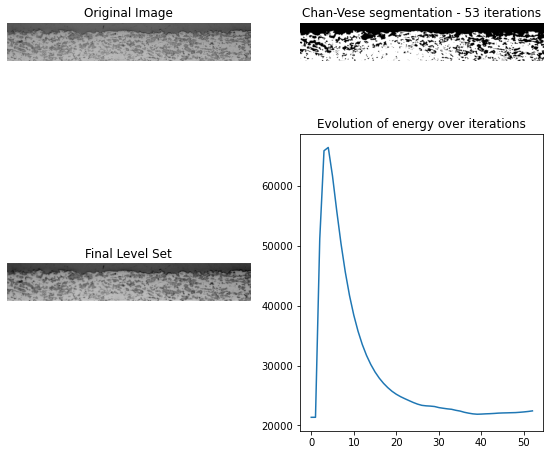

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(img_roi, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

<h4> Kanten </h4>

In [36]:
from skimage import feature